In [1]:
import sys
import scipy.io as sio
sys.path.append("../src")
import topological_advection as TA
import matplotlib.pyplot as plt
import numpy as np

In [2]:

FDsizes = [100,100] #the Fundamental Domain goes from 0 to FDsizes[0] in the x direction, and 0 to FDsizes[1] in the y direction
#One inportant thing to note is that we need to have all of our trajectories lie in a fundamental domain who's lower left corner is (0,0).
Domain = [[0,0], FDsizes]

traj = []
file = open("ensemble2.txt","r")
tempSlice = []
for line in file:
    if line == "\n":
        traj.append(tempSlice)
        tempSlice = []
    else:
        vals = line.split()
        tempSlice.append([float(vals[0]),float(vals[1])])
    
times = [i for i in range(len(traj))]

In [3]:
TopAdvec = TA.TopologicalAdvection(traj, times, Domain, PeriodicBC = True)

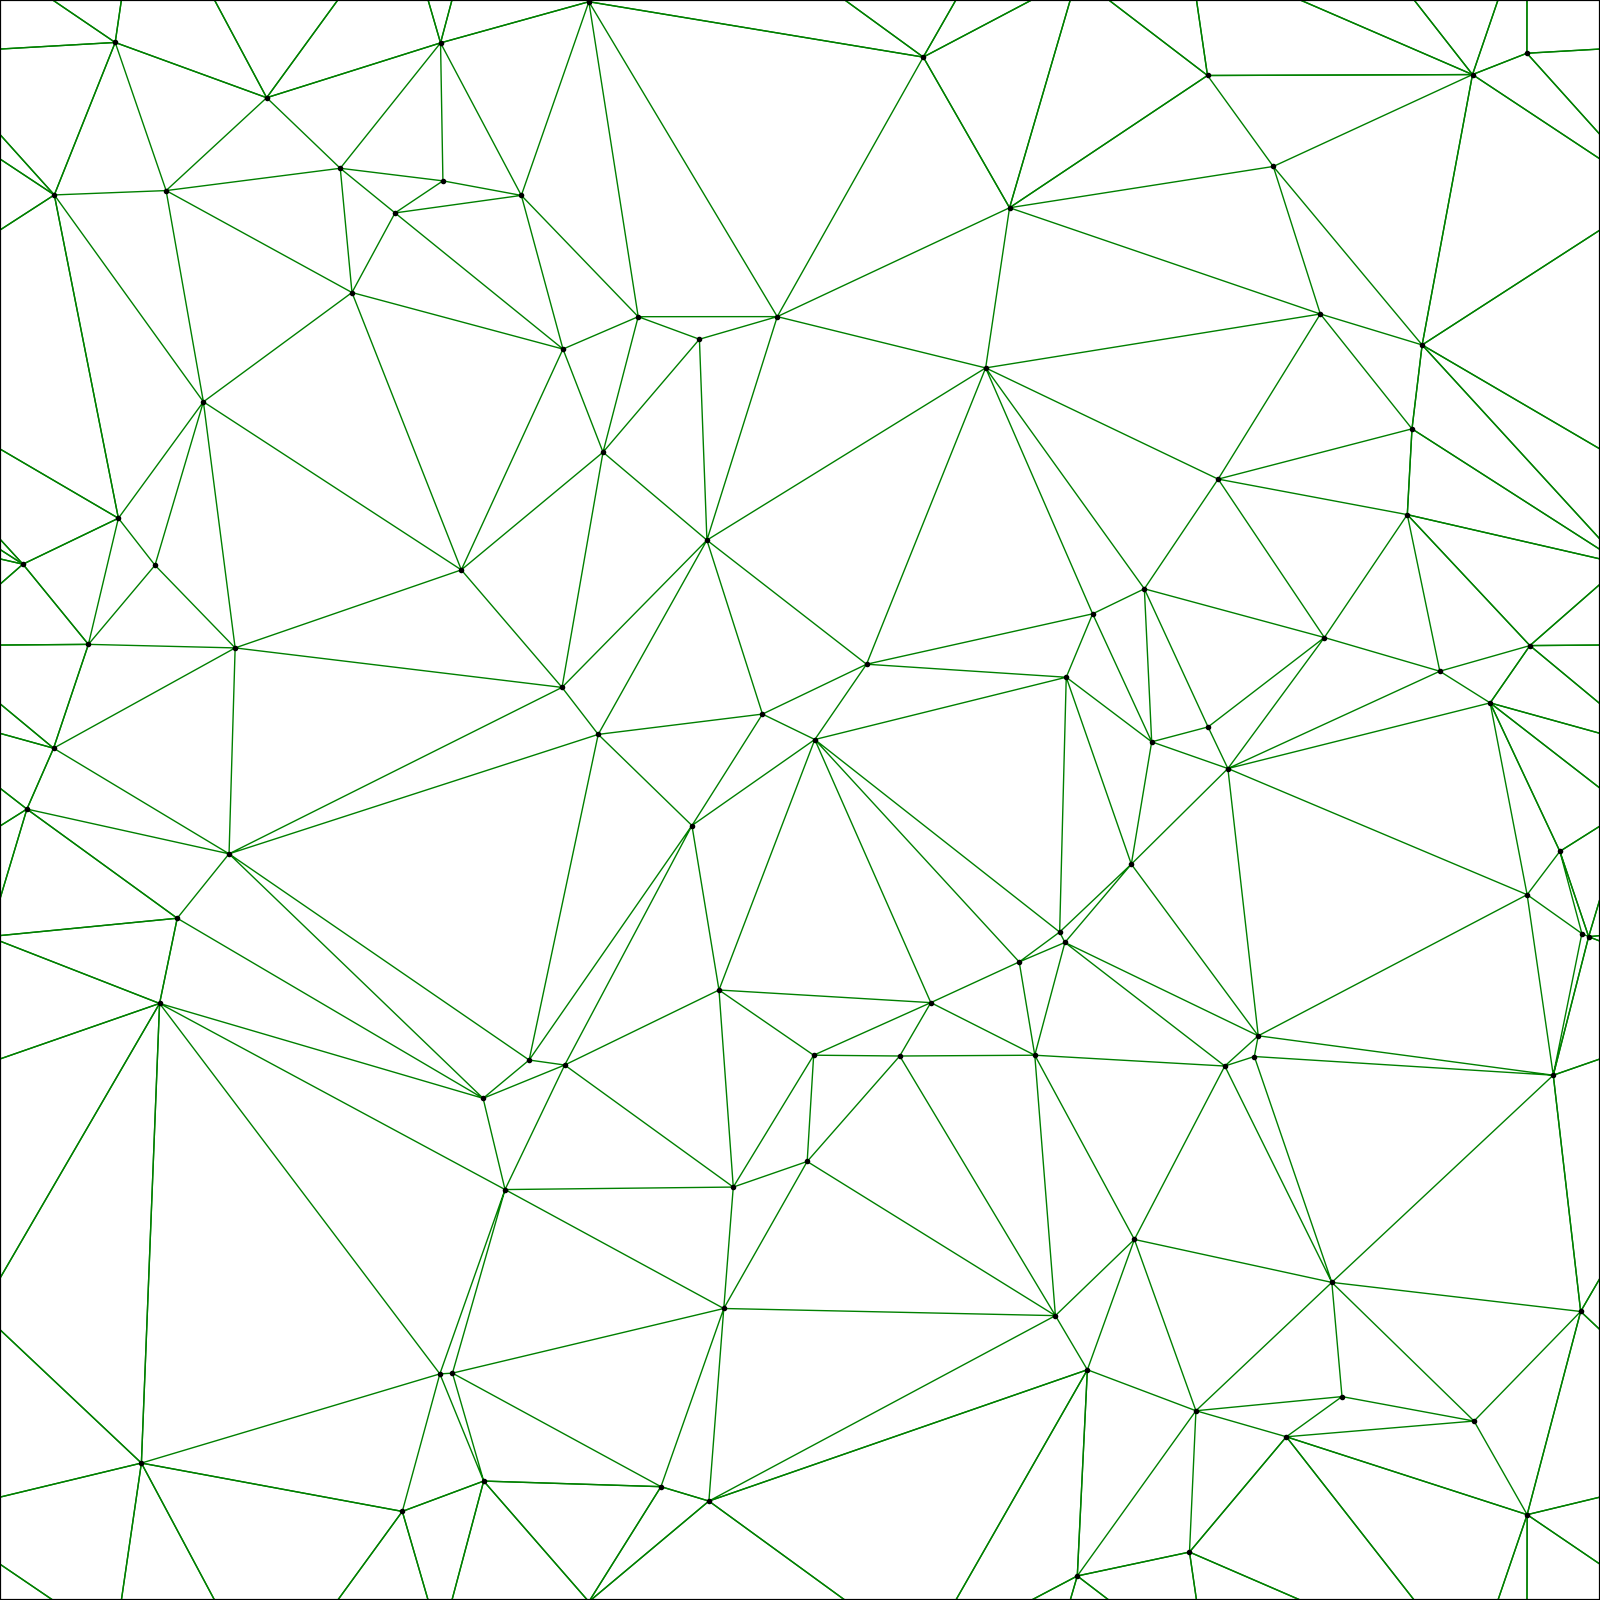

In [4]:
TopAdvec.SetPlotParameters(markersize = 1, dpi = 200, triplot = True)
TopAdvec.Plot(PlotLoop = False, Initial = True)

In [5]:
TE, TE_err, Weights = TopAdvec.GetTopologicalEntropy()

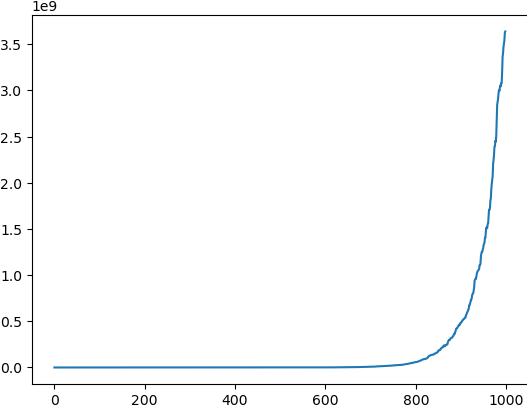

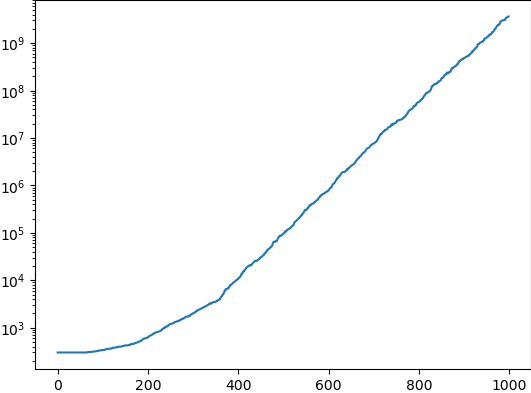

In [6]:
plt.plot(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()
plt.semilogy(TopAdvec.Times, TopAdvec.TotalWeightOverTime)
plt.show()

In [7]:
TopAdvec.PrintPlotParameters()

filename: None
triplot: True
Delaunay: True
DelaunayAdd: False
Bounds: [[0, 0], [100, 100]]
FigureSizeX: 8
dpi: 200
ptlabels: False
markersize: 1
linewidth_tri: 0.5
linecolor_tri: g
color_weights: False
log_color: True
color_map: inferno_r
linewidth_tt: 1.0
linecolor_tt: r
alpha_tt: 1.0
frac: 0.9
tt_lw_min_frac: 0.05
_conversion_factor: 0.1736111111111111
_max_weight: None


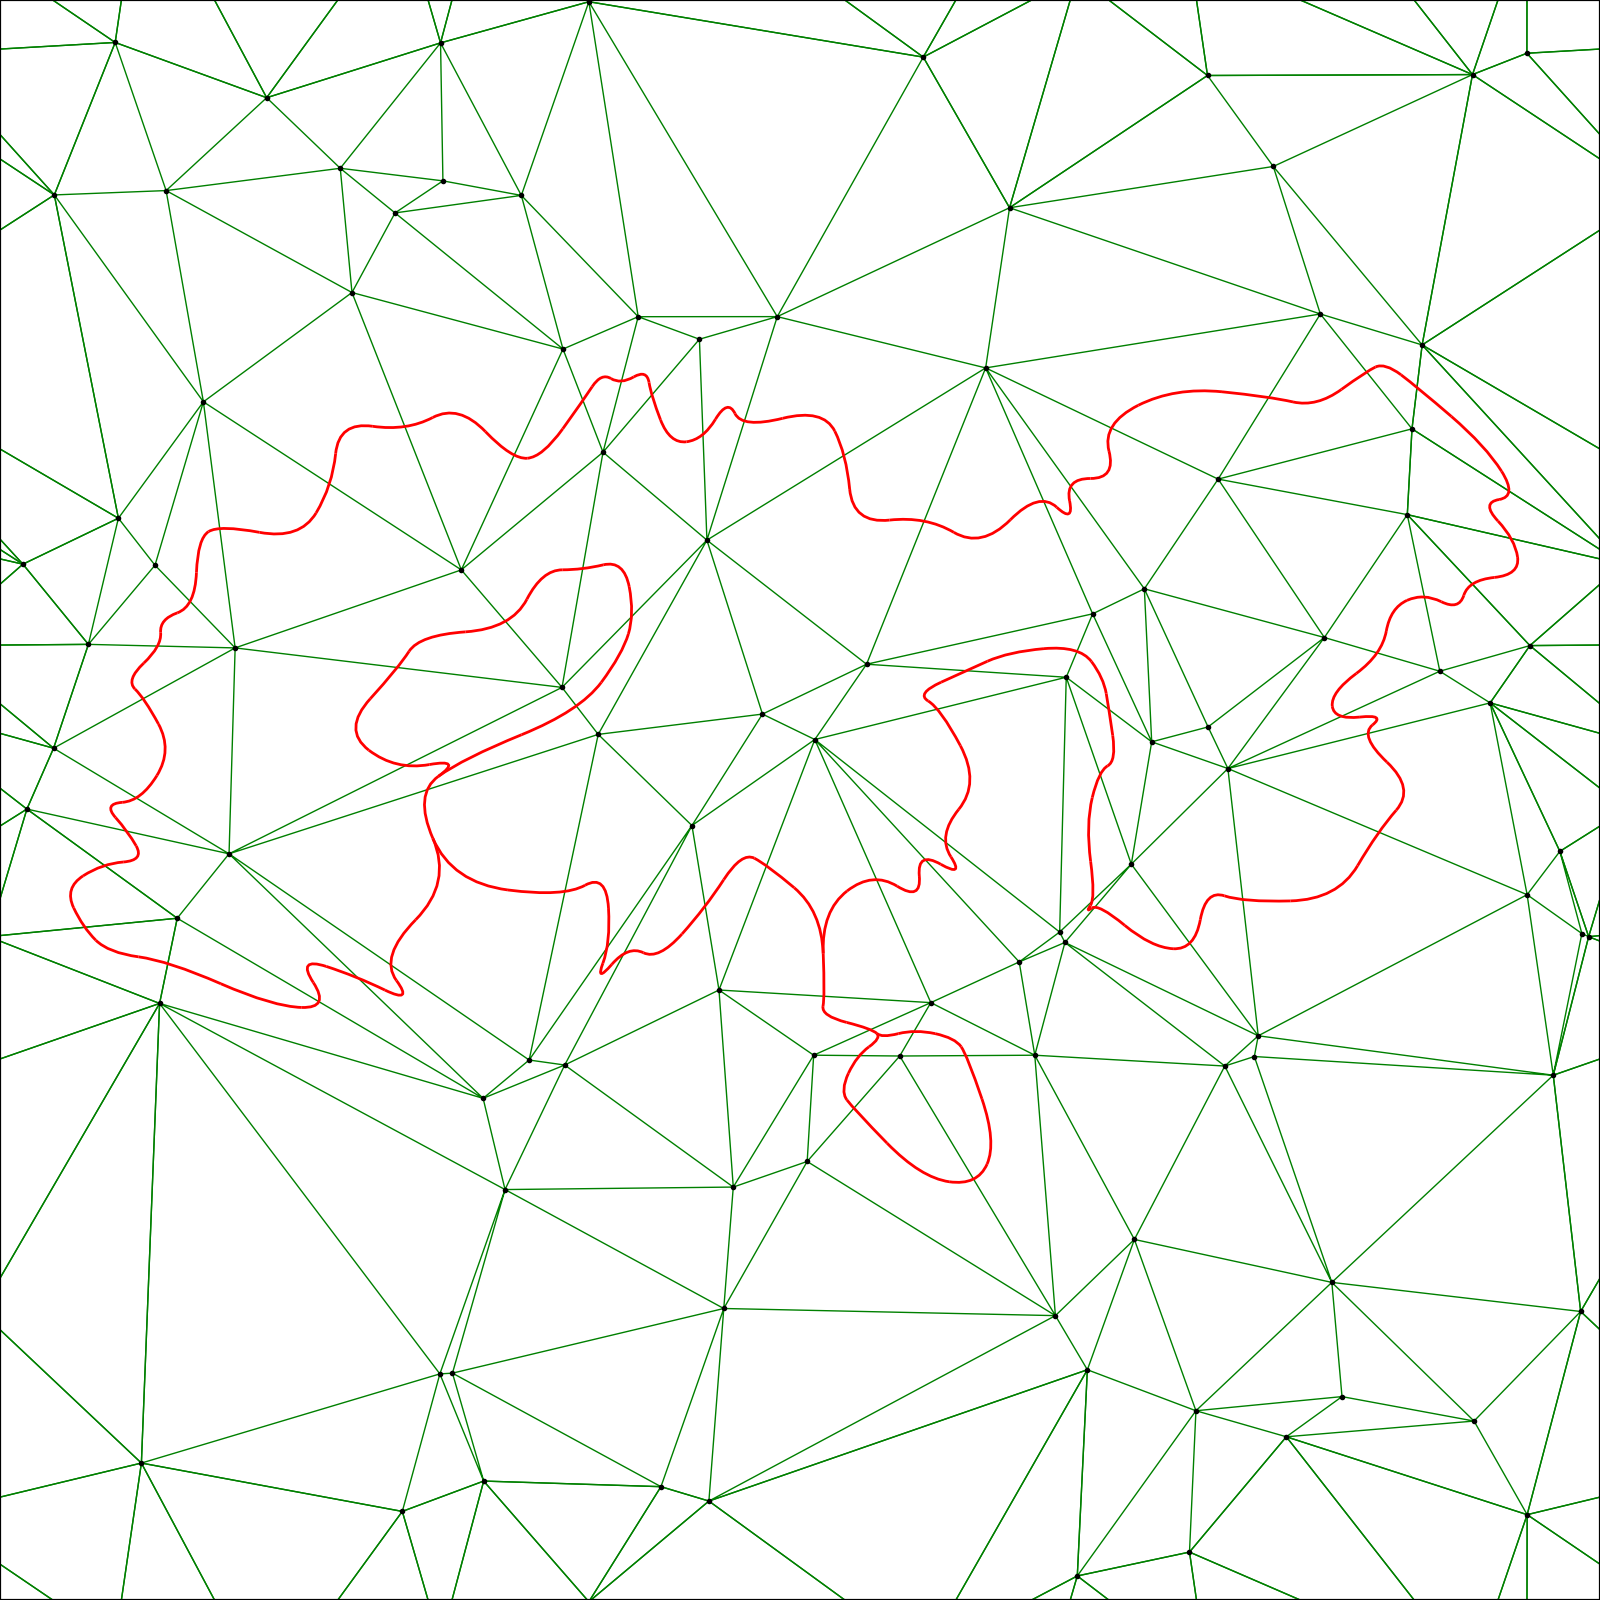

In [8]:
TopAdvec.ClearCurves()
#TopAdvec.CurveGenerator.AddEllipse([50,50], 30, 10, phi = 0.0)
#TopAdvec.CurveGenerator.AddCircle([50,50], 40)
#TopAdvec.CurveGenerator.AddRectangle([50,50], 40, 20.0, phi = 0.0)
#TopAdvec.CurveGenerator.AddSquare([50,50], 35, phi = np.pi/4)
#TopAdvec.CurveGenerator.AddVerticalLine(x_val = 50)
#TopAdvec.CurveGenerator.AddHorizontalLine(y_val = 30)
#TopAdvec.CurveGenerator.AddLineSegment([10,10], [90,50])
x_pts = np.linspace(10, 90,100)
y_pts = 40*np.sin(4*x_pts) + 40
points = np.array([x_pts,y_pts]).T
#TopAdvec.CurveGenerator.AddOpenCurve(points)
TopAdvec.CurveGenerator.AddClosedCurve(points)
TopAdvec.LoadCurves()
TopAdvec.Plot(Initial = True)